<hr>

# **HR Analytics Case Study**

<hr>

# **The Business Problem**

**SimpleYard, a growing company is facing a high attrition rate among their employees which in turn affects their business due to lack of expertise and experience.**

* **Their HR department is assigned the task to reduce the attrition rate by retaining employees who are about to churn out.**

* **They need to recommend special plans or strategies which will help them to retain their employees which in turn will help them to grow bigger as a company**

Dataset Link: https://drive.google.com/file/d/1Ob7vUaqyhT3dWwIARFObW_pXRPh1GZwx/view?usp=sharing

#**Step 1 - Importint of Libraries**

**Classic Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Configuration libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<hr>

#**Step-2 - Loading the data and data inspection**

<hr>

**Load Data**

In [ ]:
df = pd.read_csv('/content/employe.csv')

**Data Inspection**

Personally identifiable information (PII) - Some private data like Name, Adrress Region that can led to social conflicts

In [ ]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


**Insights**
* **Left** Column is the one which tells us if an employee has left the company or not
* The other columns can be a very powerful determinant for an employee to leave the company

**Shape Inspection**

In [ ]:
a = df.shape
print(f'Rows: {a[0]} and columns: {a[1]}')

Rows: 14999 and columns: 10


**Brief on the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Insights**
* **No null Values**
* **salary and dept --> String Data**
* **Salary can be a considerable factor for an employee for the leaving the company**
* **PromotionInLast5Year plays a very significant role**

<hr>

**Statistical Summary**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfactoryLevel,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
lastEvaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
numberOfProjects,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
avgMonthlyHours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
timeSpent.company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
workAccident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotionInLast5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


**Insights**
* **On an average an employee is getting overwroked as we can see mean of average working hour is 201**
* **On an avearge employees are 60% satisfied from the company**

**Solution**
* **We can promote more people**

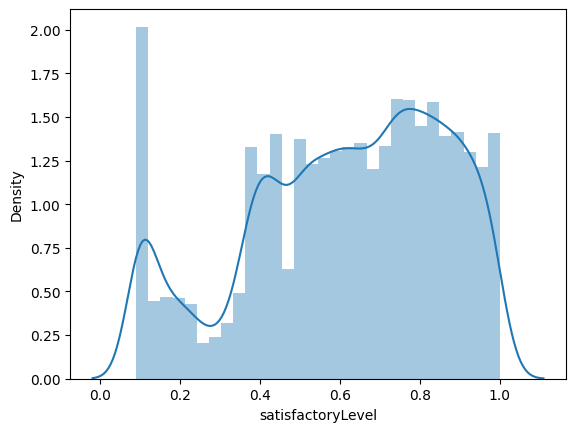

In [ ]:
sns.distplot(df['satisfactoryLevel'])
plt.show()

# **Step 3 - Data Preprocessing**
<hr>

**Null Values**

In [ ]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


**Duplicates Check**

In [ ]:
df.duplicated().sum()

3008

In [ ]:
# Remove the duplicates
df = df.drop_duplicates()

**Shape Inspection**

In [ ]:
a = df.shape
print(f'Rows: {a[0]} and columns: {a[1]}')

Rows: 11991 and columns: 10


<hr>

# Step 4 - Exploratory Data Analysis (EDA)
* **Graphical analysis with the help of Data**

<hr>

**1. How many employees are there in the company an how many have already left**

Text(0.5, 1.0, 'Plot 1: Attrition rate of a company')

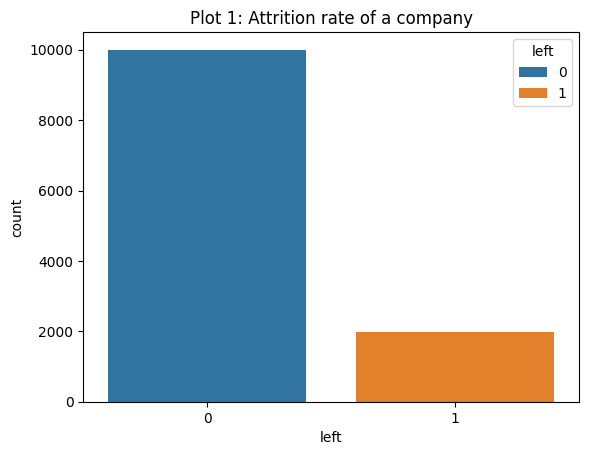

In [ ]:
sns.countplot(x = df['left'],hue= df['left'])
plt.title('Plot 1: Attrition rate of a company')

* **The people who have left company assuming that there were total 11991, out of which 1/6th of them have left**

In [ ]:
df['left'].value_counts()

,count
left,
0,10000
1,1991


In [ ]:
df['left'].value_counts(normalize = True) * 100

,proportion
left,
0,83.39588
1,16.60412


**2. Which Department has most number of employee who churned out**

In [ ]:
df['dept'].value_counts()

,count
dept,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


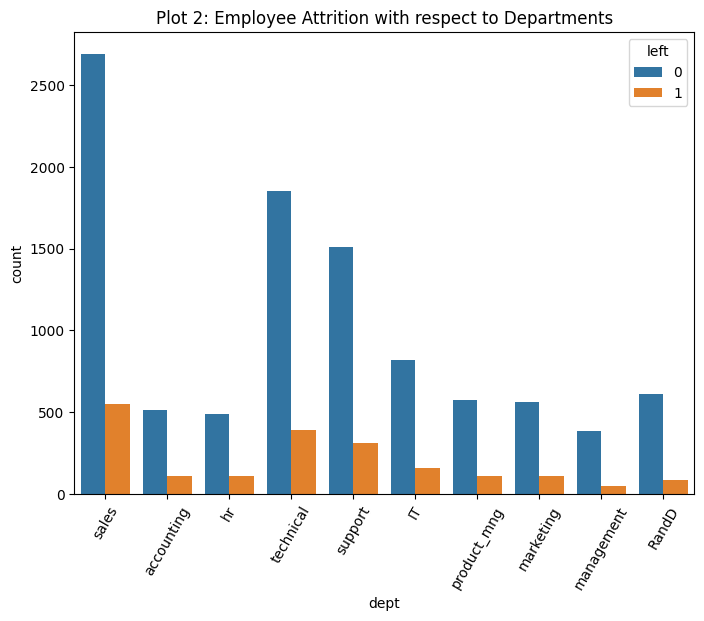

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = df['dept'],hue = df['left'])
plt.title('Plot 2: Employee Attrition with respect to Departments')
plt.xticks(rotation = 60)
plt.show()

**Insights**
* **Sales is one with the highest attrition rate**
* **Management is the lowest**

<hr>

**To get exact count of people who have left from each department**

In [ ]:
dept_data = pd.crosstab(df['dept'],df['left'])
dept_data

left,0,1
dept,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


In [ ]:
df['dept'].value_counts(normalize = True) * 100

,proportion
dept,
sales,27.011926
technical,18.714036
support,15.186390
IT,8.139438
RandD,5.787674
product_mng,5.720957
marketing,5.612543
accounting,5.178884
hr,5.012092


In [ ]:
# Groupby method
df.groupby(by='dept').sum()['left'].sort_values(ascending = True)

,left
dept,
management,52
RandD,85
accounting,109
product_mng,110
marketing,112
hr,113
IT,158
support,312
technical,390


In [ ]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

**3. What is the attrition rate of employee leaving the company having project less than 3**

In [ ]:
less_project = df.loc[(df['numberOfProjects']<3) & (df['left'] == 1)]
print(f'The number of people: {len(less_project)}')
print(f'Percentage : {(len(less_project) / 11991)* 100}%')

The number of people: 857
Percentage : 7.147026936869319%


**4. What is the attrition rate of employee leaving the company having project greater than 5**

In [ ]:
more_project = df.loc[(df['numberOfProjects']>=5) & (df['left'] == 1)]
print(f'The number of people: {len(more_project)}')
print(f'Percentage : {(len(more_project) / 11991)* 100}%')

The number of people: 859
Percentage : 7.163706112918023%


<hr>

**Insight**

**The number of projects is not very influential factor to determine if an employee is going leave a company or not**

**Graphs**

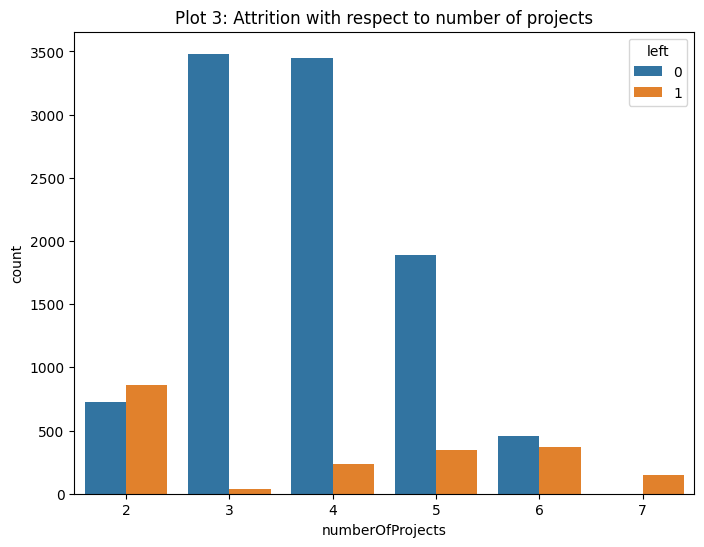

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = df['numberOfProjects'],hue = df['left'])
plt.title('Plot 3: Attrition with respect to number of projects')
plt.show()

**People who are having less projects and who are more both are leaving the company**

<hr>

**4. The number of projects with respect to time spend in the company to find out the employees who have left**

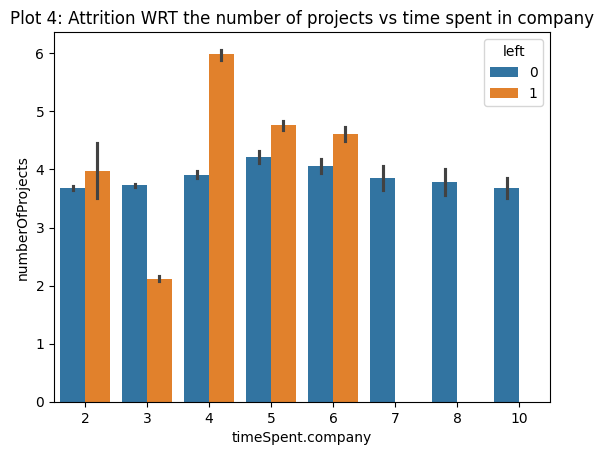

In [ ]:
sns.barplot(x = df['timeSpent.company'],y = df['numberOfProjects'],hue = df['left'])
plt.title('Plot 4: Attrition WRT the number of projects vs time spent in company')
plt.show()

**We need to work with freshers and with the mid senior level**

**5. how the salary could be a reason?**

In [ ]:
df['salary'].value_counts(normalize = True) * 100


,proportion
salary,
low,47.869235
medium,43.874573
high,8.256192


**Analysing the left column with respect to salary**

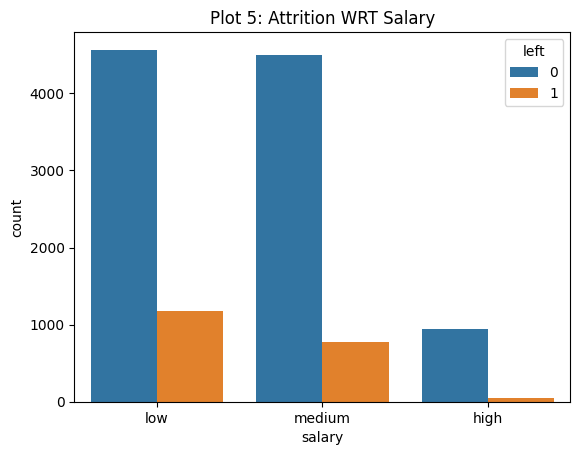

In [ ]:
sns.countplot(x = df['salary'],hue = df['left'])
plt.title('Plot 5: Attrition WRT Salary')
plt.show()

**Now lets compare time spend with respect to salary**

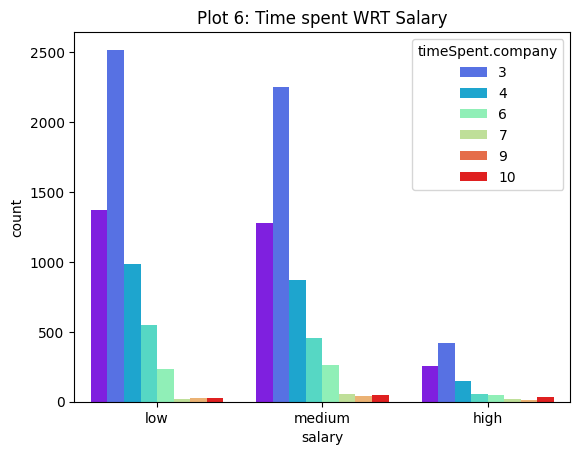

In [ ]:
sns.countplot(x = df['salary'],hue = df['timeSpent.company'],palette='rainbow')
plt.title('Plot 6: Time spent WRT Salary')
plt.show()

**Insight**
* **Employees are working for years but still not getting the hike**

In [ ]:
more_working_hours = df.loc[df['avgMonthlyHours'] > 180]
print(f'People who have worked more than 180 hours: {len(more_working_hours)}')

People who have worked more than 180 hours: 7287


**Insights**

**Having more working hour can also be a factor for churning of employees**

<hr>

# **Step 5 - Finalize the results from insights**

According to the analysis we have done so far, we can conclude that:
* The majority of the issue with this department that are working direclty with clients like Sales, IT, Support etc.
* Working hour are quite high, almost 60% of employyes are being overworked. that is most influential parameter to determine attrition
* The salary of the people WRT to their time spent in the comapny is very less.
* Promotion in last 5 years are also very less.
* The number of projects being handed over to the new people is high, making them overburden.

<hr>

**Final Prospect**

* Organization should work on salary structure.
* They need to reduce the working hour for the employee and projects that are handled to them.
* Promotion Should be increase in a company.

<hr>

**Recommendation**

* **Proposal for department:** Incentive can be given based on work over their salary.
* **Proposal for projects:** Number of projects should be rationalized.
* **Proposal for working hour:** It should decreased to 180

<hr>

**Suggestions**
* as HR, We have to implement the management process.
* Hire skilled and efficient people who can work on project with ease.
* Hiring interns so that we can buy some more time for other employees. (Reduce the burden)
* Promotion should be based on the last project.
* Perform this analysis after each 3 months fro a routine update on a company's attrition.


# **BONUS**

Memory Optimization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   timeSpent.company      11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   dept                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
df_copy = df.copy()
df_copy.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [ ]:
for x in df_copy.columns:
  if df_copy[x].dtype == 'int64':
    df_copy[x] = df_copy[x].astype('int16')

  if df_copy[x].dtype == 'float64':
    df_copy[x] = df_copy[x].astype('float16')

  if df_copy[x].dtype == 'object':
    df_copy[x] = df_copy[x].astype('category')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfactoryLevel      11991 non-null  float16 
 1   lastEvaluation         11991 non-null  float16 
 2   numberOfProjects       11991 non-null  int16   
 3   avgMonthlyHours        11991 non-null  int16   
 4   timeSpent.company      11991 non-null  int16   
 5   workAccident           11991 non-null  int16   
 6   left                   11991 non-null  int16   
 7   promotionInLast5years  11991 non-null  int16   
 8   dept                   11991 non-null  category
 9   salary                 11991 non-null  category
dtypes: category(2), float16(2), int16(6)
memory usage: 305.0 KB


In [ ]:
df_copy.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.379883,0.529785,2,157,3,0,1,0,sales,low
1,0.799805,0.859863,5,262,6,0,1,0,sales,medium
2,0.109985,0.879883,7,272,4,0,1,0,sales,medium
3,0.370117,0.520020,2,159,3,0,1,0,sales,low
4,0.409912,0.500000,2,153,3,0,1,0,sales,low
